In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

%matplotlib inline

In [2]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [10]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    return image

In [11]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

[array([201.8091772 , 141.98282187, 134.54888488]),
 array([240.59957799, 148.39717578,  28.0990099 ]),
 array([107.50177679,  78.4602606 ,  86.47649727]),
 array([247.50946989, 197.85790015, 153.70859496]),
 array([119.89945047,  13.33053272,  19.45846769]),
 array([85.64366036, 50.56321203, 48.99775099]),
 array([155.13718335, 102.46726355, 105.38477532]),
 array([41.44161757, 29.98115333, 34.45337621]),
 array([20.77413505,  6.9040763 ,  7.97972728]),
 array([159.36578321,  67.17802666,  26.76769878])]

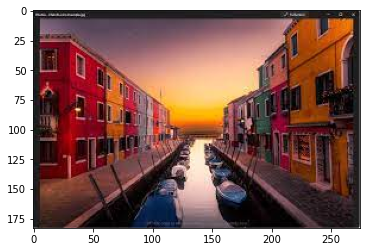

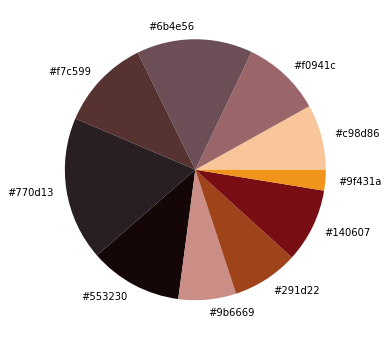

In [19]:
get_colors(get_image('download.jpg'), 10, True)